In [27]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [28]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [29]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [30]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
#1 hidden layer
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
#2 hidden layers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [96]:
#3 hidden layers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 355us/step - loss: 0.4923 - acc: 0.7856 - val_loss: 0.3721 - val_acc: 0.8699
Epoch 2/20
15000/15000 [==============================] - 5s 320us/step - loss: 0.2972 - acc: 0.9077 - val_loss: 0.3098 - val_acc: 0.8870
Epoch 3/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.2274 - acc: 0.9289 - val_loss: 0.3040 - val_acc: 0.8778
Epoch 4/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.1890 - acc: 0.9403 - val_loss: 0.2872 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.1598 - acc: 0.9521 - val_loss: 0.2769 - val_acc: 0.8888
Epoch 6/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.1376 - acc: 0.9603 - val_loss: 0.2985 - val_acc: 0.8816
Epoch 7/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.1196 - acc: 0.9663 - val_loss: 0.2874 - 

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

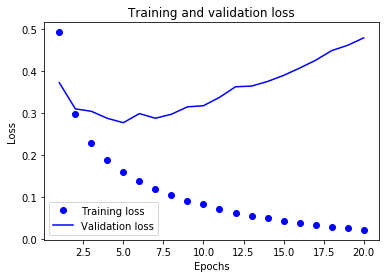

In [36]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

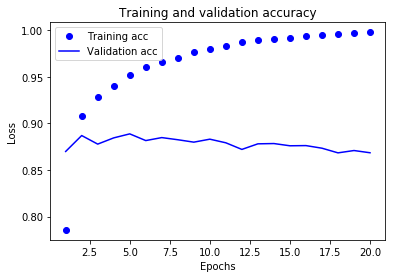

In [37]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 2 hidden layers, 32 units

In [38]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 9s 363us/step - loss: 0.4363 - acc: 0.8142
Epoch 2/4
25000/25000 [==============================] - 5s 215us/step - loss: 0.2431 - acc: 0.9117
Epoch 3/4
25000/25000 [==============================] - 5s 202us/step - loss: 0.1887 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 18s 713us/step


## 2 hidden layers, 64 units

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 294us/step - loss: 0.4284 - acc: 0.8096
Epoch 2/4
25000/25000 [==============================] - 6s 247us/step - loss: 0.2392 - acc: 0.9078
Epoch 3/4
25000/25000 [==============================] - 6s 258us/step - loss: 0.1810 - acc: 0.9315
Epoch 4/4
25000/25000 [==============================] - 6s 244us/step


## 2 hidden layers, 128 units

In [40]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 12s 478us/step - loss: 0.4286 - acc: 0.8078
Epoch 2/4
25000/25000 [==============================] - 10s 390us/step - loss: 0.2356 - acc: 0.9068
Epoch 3/4
25000/25000 [==============================] - 9s 350us/step - loss: 0.1630 - acc: 0.9367
Epoch 4/4
25000/25000 [==============================] - 8s 335us/step


## MSE loss function

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 21s 831us/step - loss: 0.1379 - acc: 0.8091
Epoch 2/4
25000/25000 [==============================] - 6s 254us/step - loss: 0.0703 - acc: 0.9118
Epoch 3/4
25000/25000 [==============================] - 6s 245us/step - loss: 0.0515 - acc: 0.9340
Epoch 4/4
25000/25000 [==============================] - 24s 972us/step


## TANH activation function

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 16s 653us/step - loss: 0.1254 - acc: 0.8276
Epoch 2/4
25000/25000 [==============================] - 6s 247us/step - loss: 0.0654 - acc: 0.9139
Epoch 3/4
25000/25000 [==============================] - 7s 288us/step - loss: 0.0530 - acc: 0.9315
Epoch 4/4
25000/25000 [==============================] - 33s 1ms/step


## Hometask2

In [84]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


In [85]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [86]:
from keras.utils.np_utils import to_categorical
y_train = np.array(train_labels)
y_test = np.array(test_labels)


'one_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)'

In [87]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 1 hidden layer

In [88]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 473us/step - loss: 0.5271 - acc: 0.8411 - val_loss: 0.2897 - val_acc: 0.8856
Epoch 2/20
15000/15000 [==============================] - 6s 408us/step - loss: 0.2105 - acc: 0.9201 - val_loss: 0.2880 - val_acc: 0.8850
Epoch 3/20
15000/15000 [==============================] - 6s 400us/step - loss: 0.1552 - acc: 0.9422 - val_loss: 0.3135 - val_acc: 0.8799
Epoch 4/20
15000/15000 [==============================] - 6s 411us/step - loss: 0.1153 - acc: 0.9590 - val_loss: 0.3274 - val_acc: 0.8815
Epoch 5/20
15000/15000 [==============================] - 6s 414us/step - loss: 0.0870 - acc: 0.9693 - val_loss: 0.3576 - val_acc: 0.8786
Epoch 6/20
15000/15000 [==============================] - 7s 480us/step - loss: 0.0628 - acc: 0.9783 - val_loss: 0.4266 - val_acc: 0.8691
Epoch 7/20
15000/15000 [==============================] - 6s 391us/step - loss: 0.0432 - acc: 0.9864 - val_loss: 0.4619 - 

## 2 hidden layers

In [89]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 641us/step - loss: 0.6175 - acc: 0.7936 - val_loss: 0.4553 - val_acc: 0.7988
Epoch 2/20
15000/15000 [==============================] - 9s 599us/step - loss: 0.2255 - acc: 0.9144 - val_loss: 0.3963 - val_acc: 0.8390
Epoch 3/20
15000/15000 [==============================] - 8s 550us/step - loss: 0.1523 - acc: 0.9410 - val_loss: 0.4284 - val_acc: 0.8587
Epoch 4/20
15000/15000 [==============================] - 8s 512us/step - loss: 0.1072 - acc: 0.9603 - val_loss: 0.3552 - val_acc: 0.8829
Epoch 5/20
15000/15000 [==============================] - 6s 429us/step - loss: 0.0633 - acc: 0.9768 - val_loss: 0.4416 - val_acc: 0.8765
Epoch 6/20
15000/15000 [==============================] - 7s 437us/step - loss: 0.0332 - acc: 0.9875 - val_loss: 0.5764 - val_acc: 0.8740
Epoch 7/20
15000/15000 [==============================] - 7s 472us/step - loss: 0.0154 - acc: 0.9955 - val_loss: 0.8775 -

## 3 hidden layers

In [91]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 488us/step - loss: 0.5601 - acc: 0.7876 - val_loss: 0.3070 - val_acc: 0.8755
Epoch 2/20
15000/15000 [==============================] - 6s 426us/step - loss: 0.2248 - acc: 0.9111 - val_loss: 0.4453 - val_acc: 0.8263
Epoch 3/20
15000/15000 [==============================] - 6s 428us/step - loss: 0.1556 - acc: 0.9413 - val_loss: 0.3566 - val_acc: 0.8728
Epoch 4/20
15000/15000 [==============================] - 6s 421us/step - loss: 0.0991 - acc: 0.9615 - val_loss: 0.5491 - val_acc: 0.8391
Epoch 5/20
15000/15000 [==============================] - 7s 439us/step - loss: 0.0575 - acc: 0.9780 - val_loss: 0.5257 - val_acc: 0.8775
Epoch 6/20
15000/15000 [==============================] - 7s 463us/step - loss: 0.0299 - acc: 0.9899 - val_loss: 0.6667 - val_acc: 0.8750
Epoch 7/20
15000/15000 [==============================] - 6s 432us/step - loss: 0.0136 - acc: 0.9957 - val_loss: 0.8192 - 

## 2 hidden layers, 32 units

In [93]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 413us/step - loss: 0.7035 - acc: 0.8077 - val_loss: 0.3464 - val_acc: 0.8598
Epoch 2/20
15000/15000 [==============================] - 5s 353us/step - loss: 0.2310 - acc: 0.9120 - val_loss: 0.3595 - val_acc: 0.8561
Epoch 3/20
15000/15000 [==============================] - 5s 348us/step - loss: 0.1681 - acc: 0.9377 - val_loss: 0.3289 - val_acc: 0.8764
Epoch 4/20
15000/15000 [==============================] - 5s 348us/step - loss: 0.1283 - acc: 0.9521 - val_loss: 0.3239 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 5s 348us/step - loss: 0.0954 - acc: 0.9658 - val_loss: 0.5094 - val_acc: 0.8470
Epoch 6/20
15000/15000 [==============================] - 5s 351us/step - loss: 0.0688 - acc: 0.9770 - val_loss: 0.4623 - val_acc: 0.8675
Epoch 7/20
15000/15000 [==============================] - 5s 346us/step - loss: 0.0444 - acc: 0.9843 - val_loss: 0.5302 - 

## 2 hidden layers, 128 units

In [94]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 706us/step - loss: 0.5018 - acc: 0.7985 - val_loss: 0.3876 - val_acc: 0.8381
Epoch 2/20
15000/15000 [==============================] - 9s 612us/step - loss: 0.2139 - acc: 0.9163 - val_loss: 0.2825 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 9s 609us/step - loss: 0.1281 - acc: 0.9525 - val_loss: 0.3572 - val_acc: 0.8853
Epoch 4/20
15000/15000 [==============================] - 9s 618us/step - loss: 0.0739 - acc: 0.9729 - val_loss: 0.4427 - val_acc: 0.8787
Epoch 5/20
15000/15000 [==============================] - 9s 624us/step - loss: 0.0301 - acc: 0.9900 - val_loss: 0.5806 - val_acc: 0.8800
Epoch 6/20
15000/15000 [==============================] - 9s 631us/step - loss: 0.0117 - acc: 0.9968 - val_loss: 0.8882 - val_acc: 0.8468
Epoch 7/20
15000/15000 [==============================] - 11s 718us/step - loss: 0.0061 - acc: 0.9989 - val_loss: 0.8549 